In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('../data/train/train-words.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'me': 7, 'no': 8, 'please': 9, 'sorry': 10, 'thankyou': 11, 'yes': 12, 'you': 13}
(420000, 11) (420000, 14)
(2800, 150, 11) (2800, 150, 14)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2100, 150, 11) (700, 150, 11)
(2100, 150, 14) (700, 150, 14)


In [4]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(150, 11), return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

2023-03-17 21:34:56.501646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:34:56.511656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:34:56.514812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2023-03-17 21:34:57.507727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:34:57.516180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:34:57.523016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - ETA: 0s - loss: 2.1142 - accuracy: 0.2980

2023-03-17 21:35:14.682489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:35:14.688364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:35:14.702251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - 20s 180ms/step - loss: 2.1142 - accuracy: 0.2980 - val_loss: 1.6746 - val_accuracy: 0.4878
Epoch 2/20
66/66 [==============================] - 9s 133ms/step - loss: 1.4585 - accuracy: 0.5676 - val_loss: 1.2386 - val_accuracy: 0.6614
Epoch 3/20
66/66 [==============================] - 7s 110ms/step - loss: 1.1131 - accuracy: 0.7082 - val_loss: 0.9739 - val_accuracy: 0.7546
Epoch 4/20
66/66 [==============================] - 9s 136ms/step - loss: 0.8684 - accuracy: 0.7821 - val_loss: 0.7795 - val_accuracy: 0.7913
Epoch 5/20
66/66 [==============================] - 7s 111ms/step - loss: 0.6940 - accuracy: 0.8247 - val_loss: 0.6358 - val_accuracy: 0.8163
Epoch 6/20
66/66 [==============================] - 8s 120ms/step - loss: 0.5758 - accuracy: 0.8531 - val_loss: 0.5590 - val_accuracy: 0.8251
Epoch 7/20
66/66 [==============================] - 6s 86ms/step - loss: 0.4948 - accuracy: 0.8654 - val_loss: 0.4868 - val_accuracy: 0.8678
Epoch 8/20
66/66 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 64)           19456     
                                                                 
 dense (Dense)               (None, 150, 14)           910       
                                                                 
Total params: 20,366
Trainable params: 20,366
Non-trainable params: 0
_________________________________________________________________


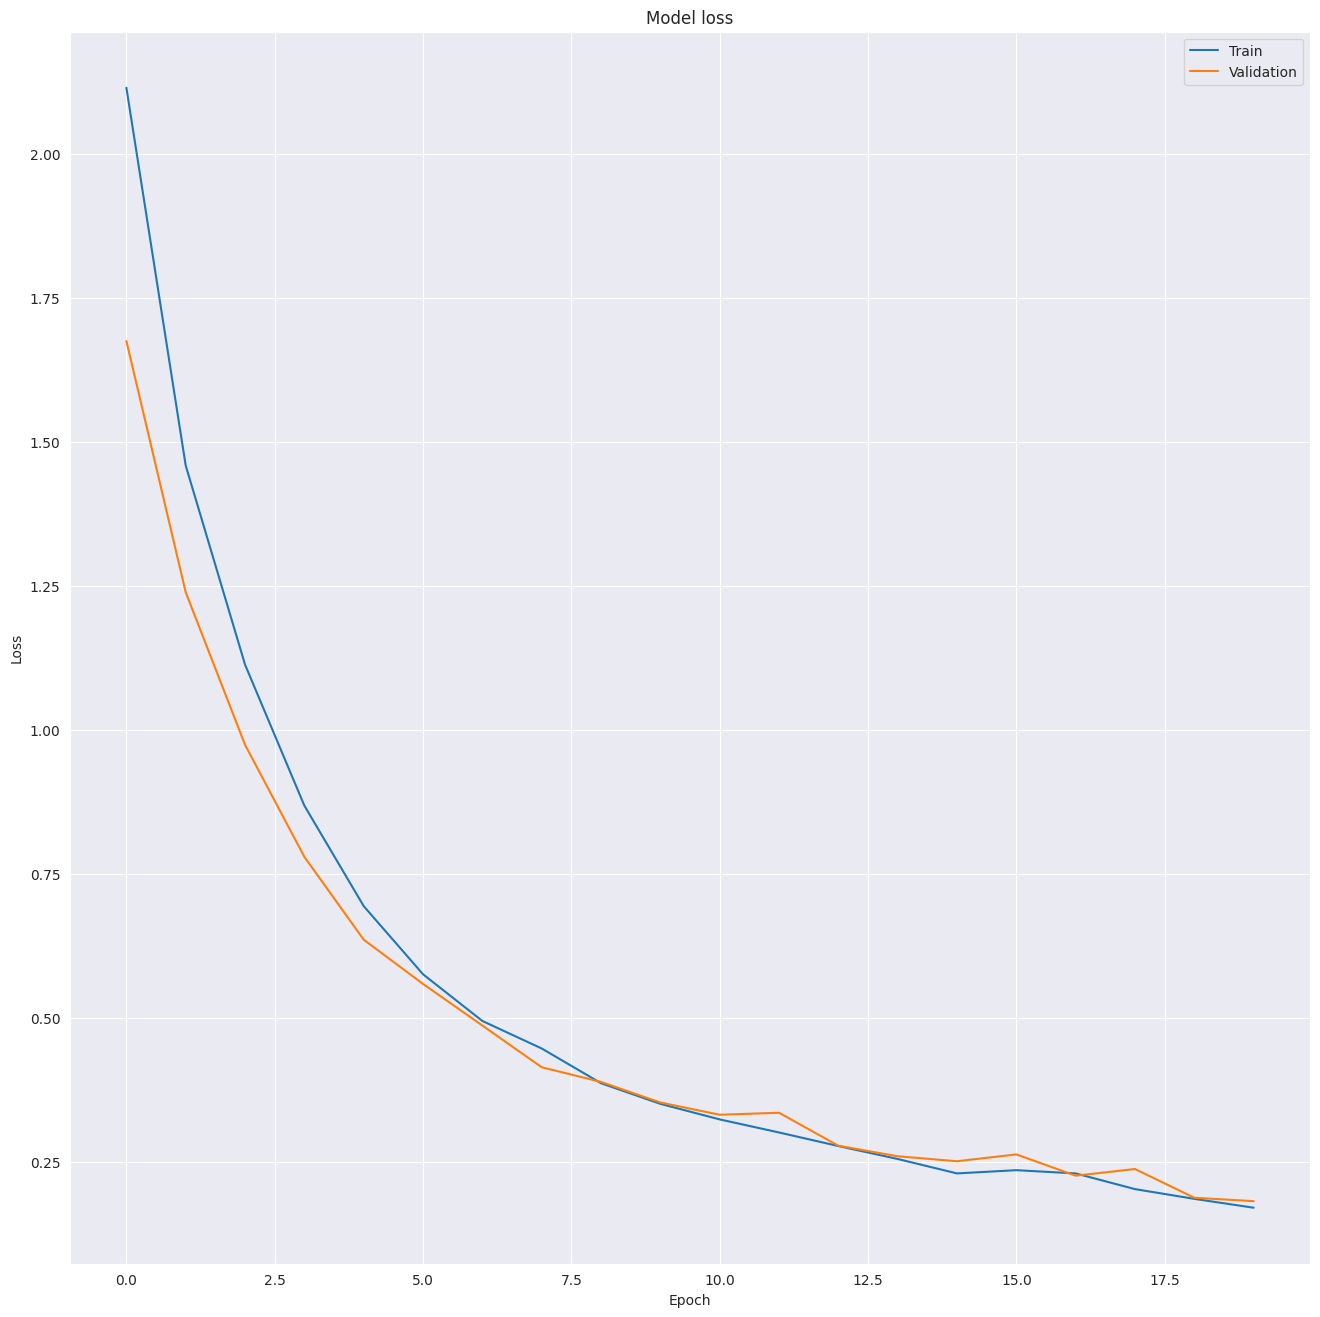

In [6]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

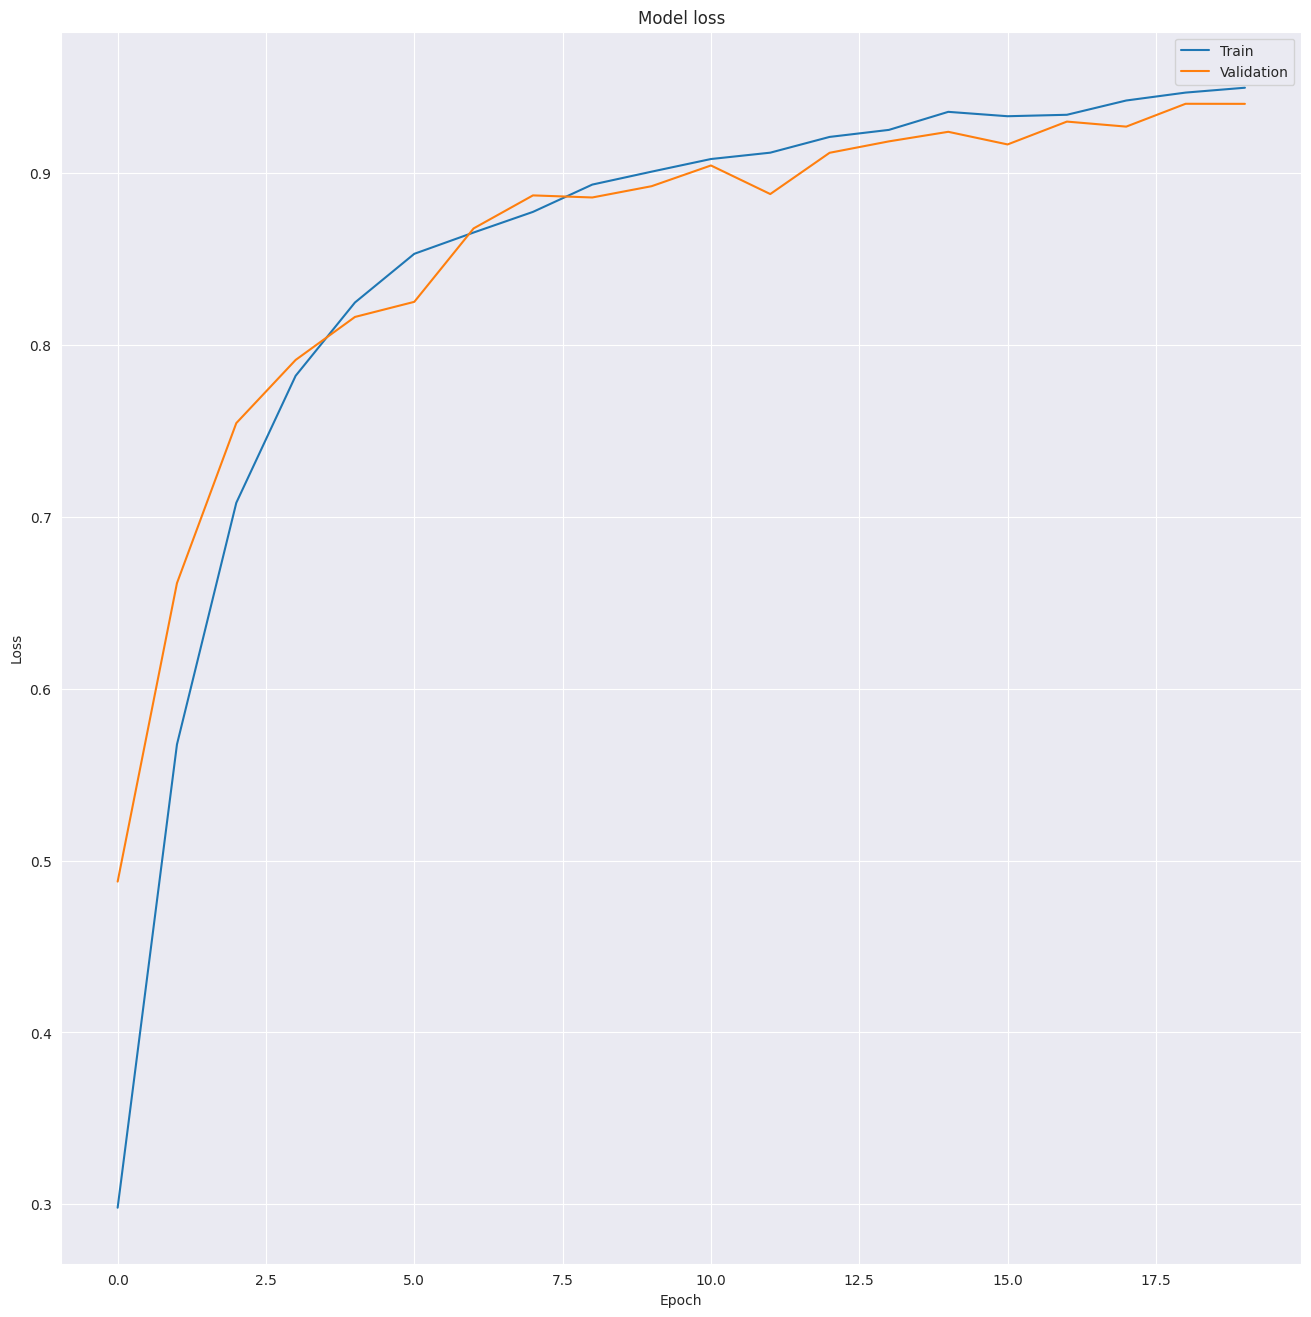

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
model.save('../models/words.h5')